#원, 사각형, 삼각형 구분하기
- 어려운 테스트 문제를 부풀림

In [1]:
!unzip hard_handwriting_shape.zip -d hard_handwriting > /dev/null

In [2]:
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

## 데이터셋 생성하기

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1/255., rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = [0.8, 1.5],     # 구간 내 임의로 확대
    horizontal_flip = True,
    vertical_flip = False,
    fill_mode = 'nearest'       
)

In [15]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

img = load_img('hard_handwriting/train/triangle/triangle001.png')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)            # x.reshape(1, 24, 24, 3)
x.shape

(1, 24, 24, 3)

## 데이터 부풀리기를 통하여 만들어지는 새로운 도형 이미지

In [10]:
import os
if not os.path.exists('preview'):
    os.mkdir('preview')

In [36]:
train_datagen.flow(x = x, y = None, batch_size = 1, save_to_dir = '/content/preview',
                   save_prefix = 'pre')     # 메모리에 있는 것을 가져옴

In [42]:
!ls -l preview

total 0


In [58]:
for i, _ in enumerate(train_datagen.flow(x, batch_size = 1, save_to_dir = 'preview',save_prefix = 'pre',  save_format = 'png')):
    if i == 30:
        break

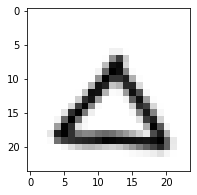

In [56]:
plt.figure(figsize = (10, 3))
for i, fname in enumerate(glob('/preview/pre_*.png')):
    plt.imshow(Image.open(fname))
    plt.show()

## data genarator

In [44]:
train_datagenerator = train_datagen.flow_from_directory(
    'hard_handwriting/train', target_size = (24, 24),
    batch_size = 3, class_mode = 'categorical'
)

Found 45 images belonging to 3 classes.


In [45]:
test_datagen = ImageDataGenerator(rescale=1/255.)
test_datagenerator = test_datagen.flow_from_directory(
    'hard_handwriting/test', target_size = (24, 24),
    batch_size = 3, class_mode = 'categorical'
)

Found 15 images belonging to 3 classes.


## 모델 정의 및 설정

In [46]:
import tensorflow as tf
import numpy as np
seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [48]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape = (24, 24, 3), activation = 'relu'),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               819328    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                        

In [49]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])
model.fit(
    train_datagenerator, steps_per_epoch=15, epochs=300,
    validation_data=test_datagenerator, validation_steps=5
)

Epoch 1/300
15/15 [==============================] - 1s 31ms/step - loss: 1.1835 - accuracy: 0.4222 - val_loss: 1.0770 - val_accuracy: 0.3333
Epoch 2/300
15/15 [==============================] - 0s 19ms/step - loss: 0.8616 - accuracy: 0.5778 - val_loss: 1.4218 - val_accuracy: 0.3333
Epoch 3/300
15/15 [==============================] - 0s 19ms/step - loss: 0.5137 - accuracy: 0.7778 - val_loss: 2.4427 - val_accuracy: 0.3333
Epoch 4/300
15/15 [==============================] - 0s 20ms/step - loss: 0.4156 - accuracy: 0.8000 - val_loss: 1.8210 - val_accuracy: 0.6000
Epoch 5/300
15/15 [==============================] - 0s 19ms/step - loss: 0.1974 - accuracy: 0.9333 - val_loss: 3.0864 - val_accuracy: 0.4000
Epoch 6/300
15/15 [==============================] - 0s 21ms/step - loss: 0.3613 - accuracy: 0.8667 - val_loss: 1.3778 - val_accuracy: 0.5333
Epoch 7/300
15/15 [==============================] - 0s 19ms/step - loss: 0.2888 - accuracy: 0.8444 - val_loss: 1.8288 - val_accuracy: 0.4667
Epoch 

In [50]:
model.evaluate(test_datagenerator)

5/5 [==============================] - 0s 7ms/step - loss: 3.0528 - accuracy: 0.7333


[3.0527725219726562, 0.7333333492279053]